In [1]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/v.0.022.zip"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.24'

In [3]:
 # Path to metadata files for Ne. Easier to have in subfolder
meta_path=r"G:\My Drive\Berkeley_NEW\DiadFit_outer\Testing\CCMR_Metadata"
# Find files
idnm='112820_Ne_' ## Update file tag

# Put the common string you can in all your Ne lines here
ID_str='Ne'
file_ext_meta='.txt' # Will only take files of this type 
exclude_str='LL' # Will exclude files of this type, sometimes images have same name
 # Leave as none unless witec appended a number
Ne_files_meta=pf.get_files(path=meta_path, file_ext=file_ext_meta, ID_str=ID_str, 
                         exclude_str=exclude_str, sort=True)

Ne_files_meta

['Ne1.txt',
 'Ne10.txt',
 'Ne11.txt',
 'Ne12.txt',
 'Ne13.txt',
 'Ne14.txt',
 'Ne15.txt',
 'Ne16.txt',
 'Ne17.txt',
 'Ne18.txt',
 'Ne19.txt',
 'Ne2.txt',
 'Ne20.txt',
 'Ne21.txt',
 'Ne22.txt',
 'Ne23.txt',
 'Ne24.txt',
 'Ne25.txt',
 'Ne26.txt',
 'Ne27.txt',
 'Ne28.txt',
 'Ne29.txt',
 'Ne3.txt',
 'Ne30.txt',
 'Ne31.txt',
 'Ne32.txt',
 'Ne33.txt',
 'Ne34.txt',
 'Ne35.txt',
 'Ne36.txt',
 'Ne37.txt',
 'Ne38.txt',
 'Ne39.txt',
 'Ne4.txt',
 'Ne40.txt',
 'Ne41.txt',
 'Ne42.txt',
 'Ne43.txt',
 'Ne44.txt',
 'Ne45.txt',
 'Ne46.txt',
 'Ne47.txt',
 'Ne48.txt',
 'Ne49.txt',
 'Ne5.txt',
 'Ne50.txt',
 'Ne51.txt',
 'Ne52.txt',
 'Ne53.txt',
 'Ne54.txt',
 'Ne55.txt',
 'Ne56.txt',
 'Ne57.txt',
 'Ne58.txt',
 'Ne59.txt',
 'Ne6.txt',
 'Ne60.txt',
 'Ne61.txt',
 'Ne62.txt',
 'Ne63.txt',
 'Ne64.txt',
 'Ne65.txt',
 'Ne66.txt',
 'Ne67.txt',
 'Ne68.txt',
 'Ne69.txt',
 'Ne7.txt',
 'Ne70.txt',
 'Ne71.txt',
 'Ne72.txt',
 'Ne73.txt',
 'Ne74.txt',
 'Ne75.txt',
 'Ne76.txt',
 'Ne77.txt',
 'Ne8.txt',
 'Ne9.txt']

In [5]:

pf.extract_acq_params(path=meta_path, filename='Ne9.txt')

(nan, 3.0, 45.0, 50.0, ['0h', '2m', '16s'], 'November 28, 2020\n', 1341.0)

In [6]:
# Extract useful metadata from each file
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, Allfiles=Ne_files_meta, 
                                prefix=False, trupower=True)
meta.head()

  0%|                                                                                        | 0/77 [42:26:10<?, ?it/s]


OSError: [Errno 22] Invalid argument

In [ ]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=False,
    suffix=False,
   file_type='.txt')

file_m

In [ ]:
wavelength =531.885 # Specify the specific wavelength of your laser 
df_Ne=pf.calculate_Ne_line_positions(wavelength=wavelength, cut_off_intensity=500)
df_Ne

In [ ]:
ideal_split=pf.calculate_Ne_splitting(wavelength=wavelength, 
                                      line1_shift=1117, line2_shift=1447,
                                     cut_off_intensity=1000)
ideal_split

In [ ]:
mypath=r"P:\WORK-ACAD\BERKELEY-VIBE\RAMAN\CORNELL FDCA DATA\CCMR FDCA RAW DATA\Timetest\SPECTRA"
filetype='headless_txt'
# Put the common string you can in all your Ne lines here
ID_str='Ne'
file_ext='txt'# Will only take files of this type 
exclude_str='LL' # Will exclude files of this type, sometimes images have same name
prefix=None # Leave as none unless witec appended a number
Ne_files=pf.get_files(path=mypath, file_ext=file_ext,
                    ID_str=ID_str, exclude_str=exclude_str, sort=True)

In [ ]:
filename='Ne1.txt'#Ne_files[12]  # Or you could put a string here, like 'NE1.txt' 
filename

In [ ]:
# Specify the approximate peak positions of the lines you are interested in
# If your drift is off the real positions, you'll have to tweak these numbers
peak1_cent=1117 # approximate position of the 1st line you are interested in
peak2_cent=1447 # Approximate position of the 2nd line you are interested in


Ne, df_sort_Ne_trim, nearest_pk1, nearest_pk2=pf.plot_Ne_lines(path=mypath, filename=filename, filetype=filetype, 
n_peaks=6, peak1_cent=peak1_cent, peak2_cent=peak2_cent,
height=10, threshold=0.6, distance=1, prominence=10, width=1, exclude_range_1=None,
exclude_range_2=None)

In [370]:
pf.Ne_peak_config()

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=1, lower_bck_pk1=(-50, -25), upper_bck1_pk1=(8, 15), upper_bck2_pk1=(30, 50), lower_bck_pk2=(-44.2, -22), upper_bck1_pk2=(15, 50), upper_bck2_pk2=(50, 51), x_range_baseline=20, y_range_baseline=200, pk1_amplitude=100, pk2_amplitude=100, x_range_peak=15, x_range_residual=7, LH_offset_mini=(1.5, 3), x_span_pk1=None, x_span_pk2=None)

In [371]:
Ne_Config=pf.Ne_peak_config(pk1_amplitude=4,pk2_amplitude=15, LH_offset_mini=[2, 5], 
lower_bck_pk1=(-50, -30), upper_bck1_pk1=[-11, -5], upper_bck2_pk1=[60, 80],
lower_bck_pk2=[-120, -90], upper_bck1_pk2=[20, 30], upper_bck2_pk2=[50, 70],
x_range_peak=15, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10], N_poly_pk1_baseline=2, N_poly_pk2_baseline=2 )
Ne_Config

Ne_peak_config(N_poly_pk1_baseline=2, N_poly_pk2_baseline=2, lower_bck_pk1=(-50, -30), upper_bck1_pk1=[-11, -5], upper_bck2_pk1=[60, 80], lower_bck_pk2=[-120, -90], upper_bck1_pk2=[20, 30], upper_bck2_pk2=[50, 70], x_range_baseline=20, y_range_baseline=200, pk1_amplitude=4, pk2_amplitude=15, x_range_peak=15, x_range_residual=7, LH_offset_mini=[2, 5], x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])

,filename,pk2_peak_cent,pk2_amplitude,pk2_sigma,pk2_gamma,error_pk2,pk1_peak_cent,pk1_amplitude,pk1_sigma,pk1_gamma,error_pk1,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_pk2,residual_pk1,residual_pk1+pk2
0,Ne1.txt,1447.777663,43008.394456,0.202923,0.202923,0.00518,1116.536945,4129.811556,0.200569,0.200569,NaN,331.240717,0.997696,NaN,NaN,177.628935,21.427881,199.056817


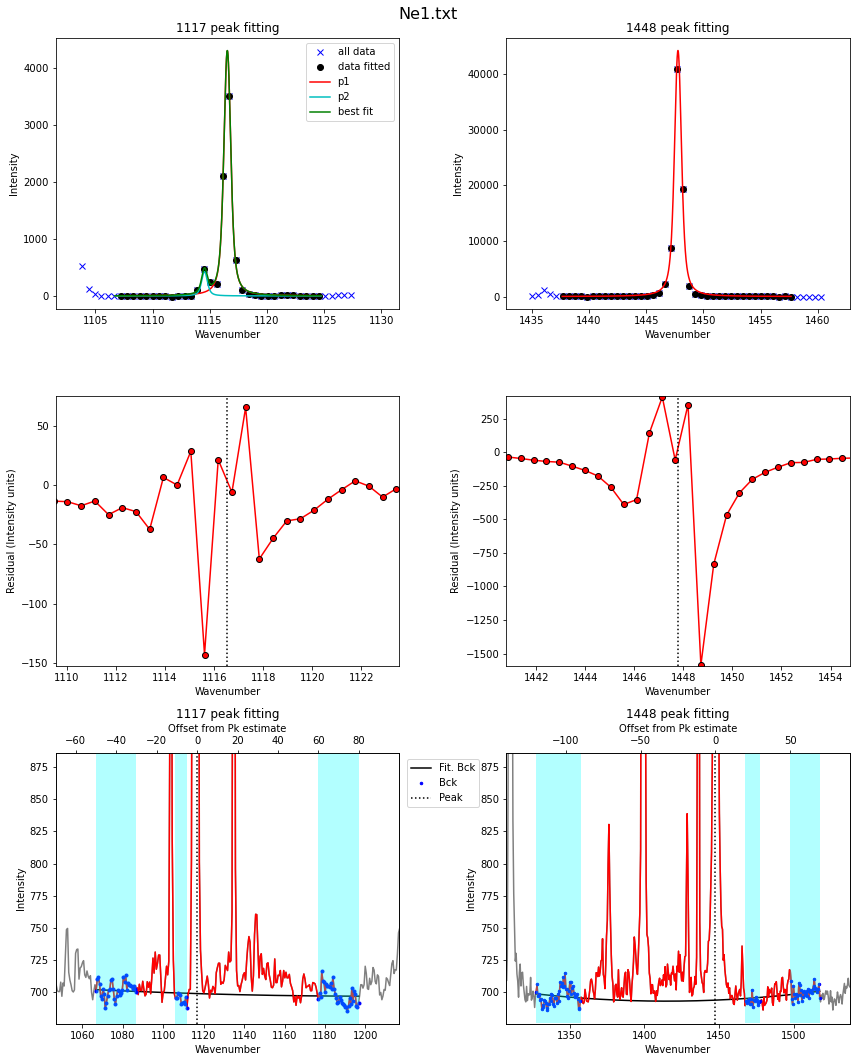

In [372]:
# You also need to set whether you want 1 peak or 2 for the LH diad
if peak1_cent==1117:
    peaks_1=2
else:
    peaks_1=1

#peaks_1=2

df_test=pf.fit_Ne_lines(  
    config=Ne_Config, peaks_1=peaks_1,
    Ne=Ne, filename=filename, path=mypath, prefix=prefix,
    Ne_center_1=nearest_pk1, Ne_center_2=nearest_pk2,
    DeltaNe_ideal=ideal_split['Ne_Split'])                                                                 
                                                                     
        
display(df_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:09<00:00,  1.18it/s]


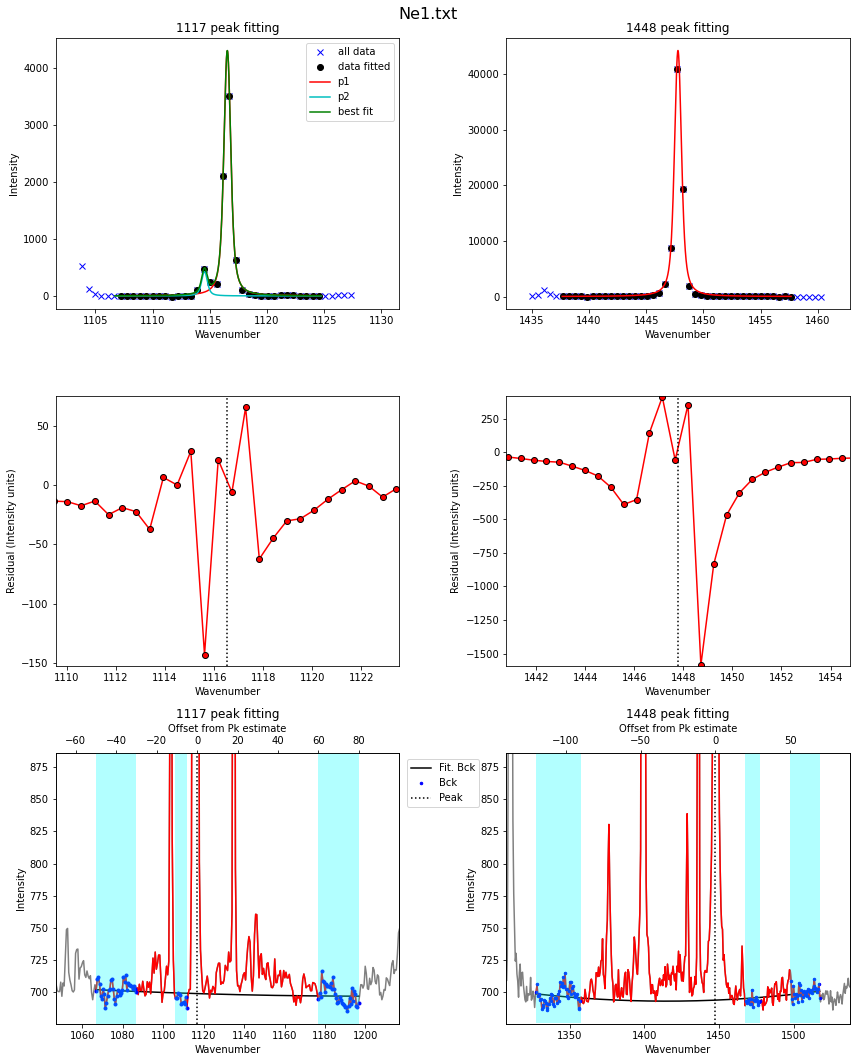

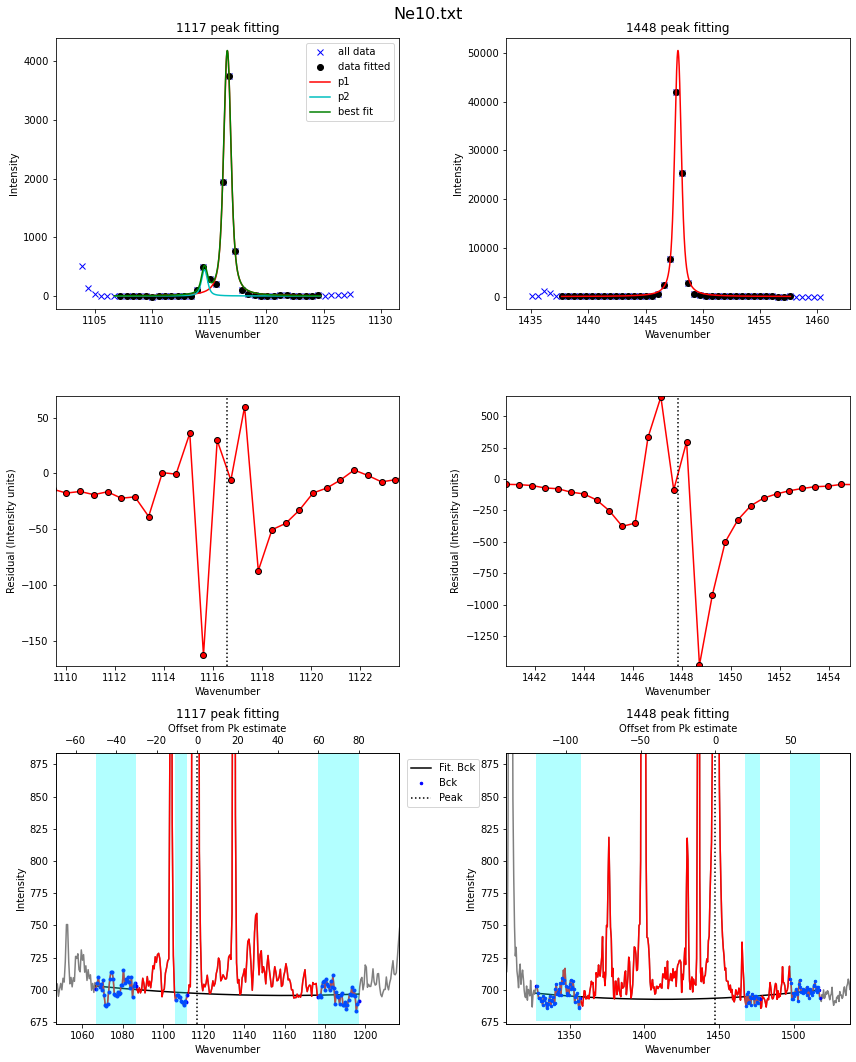

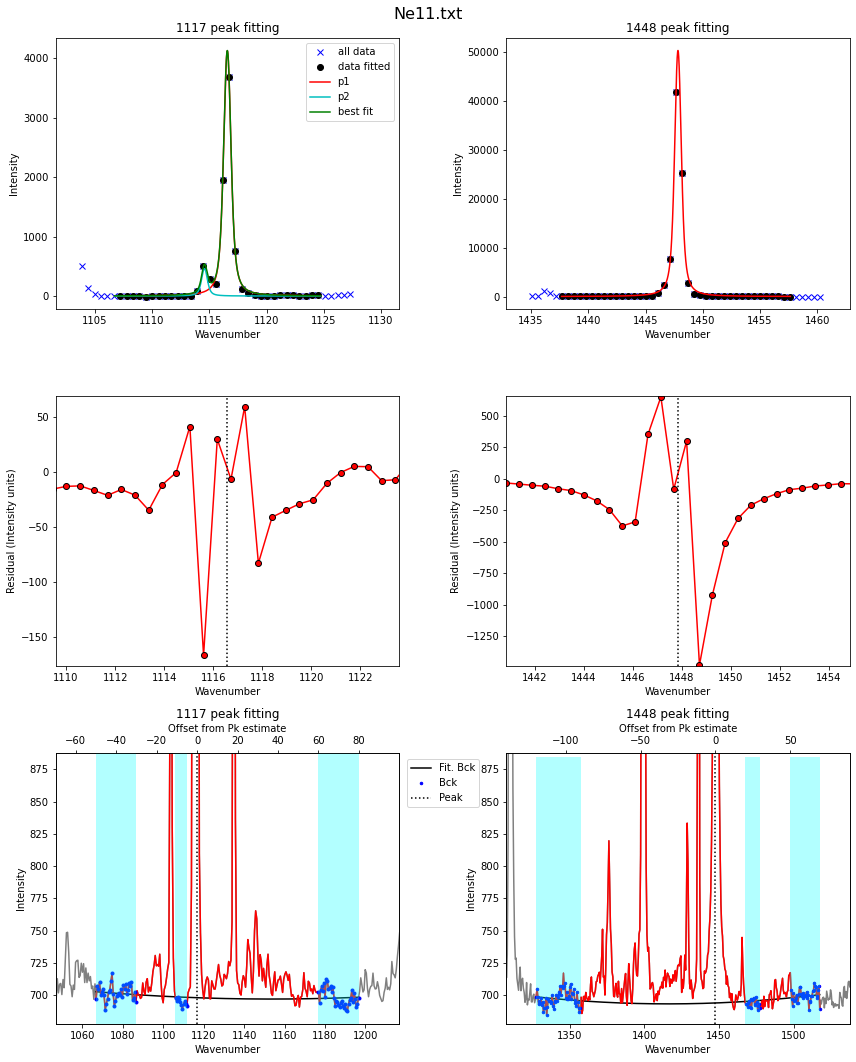

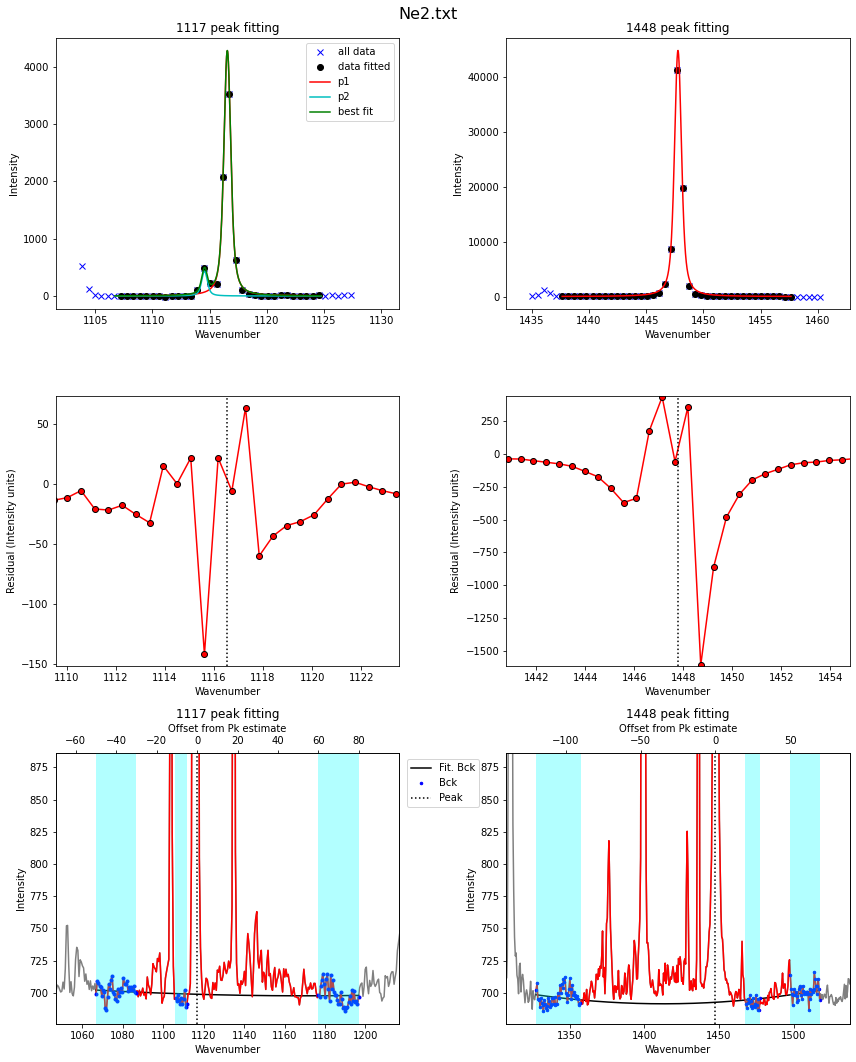

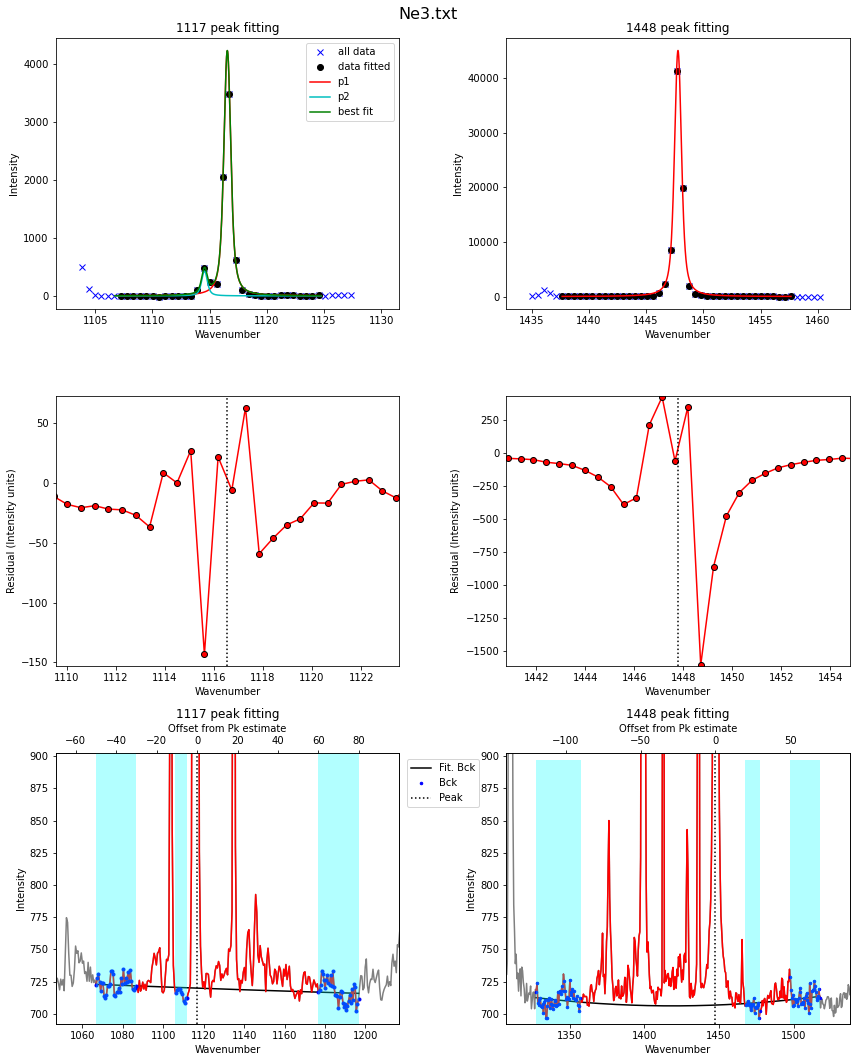

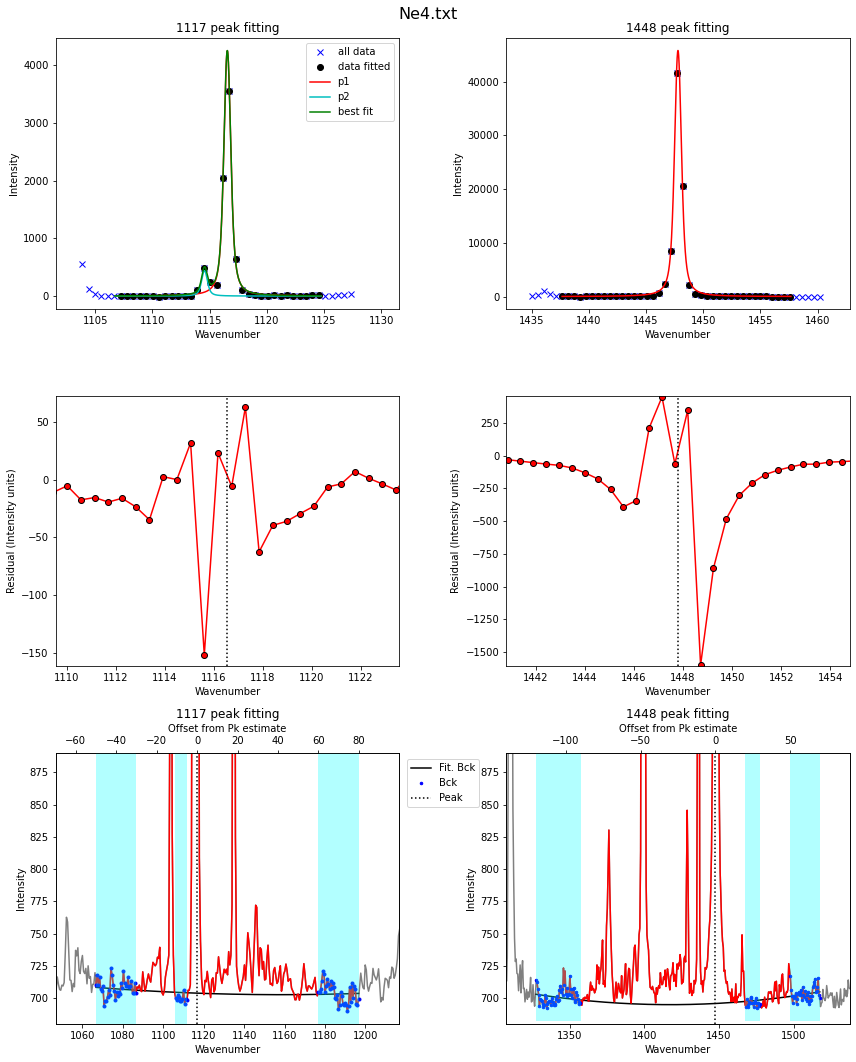

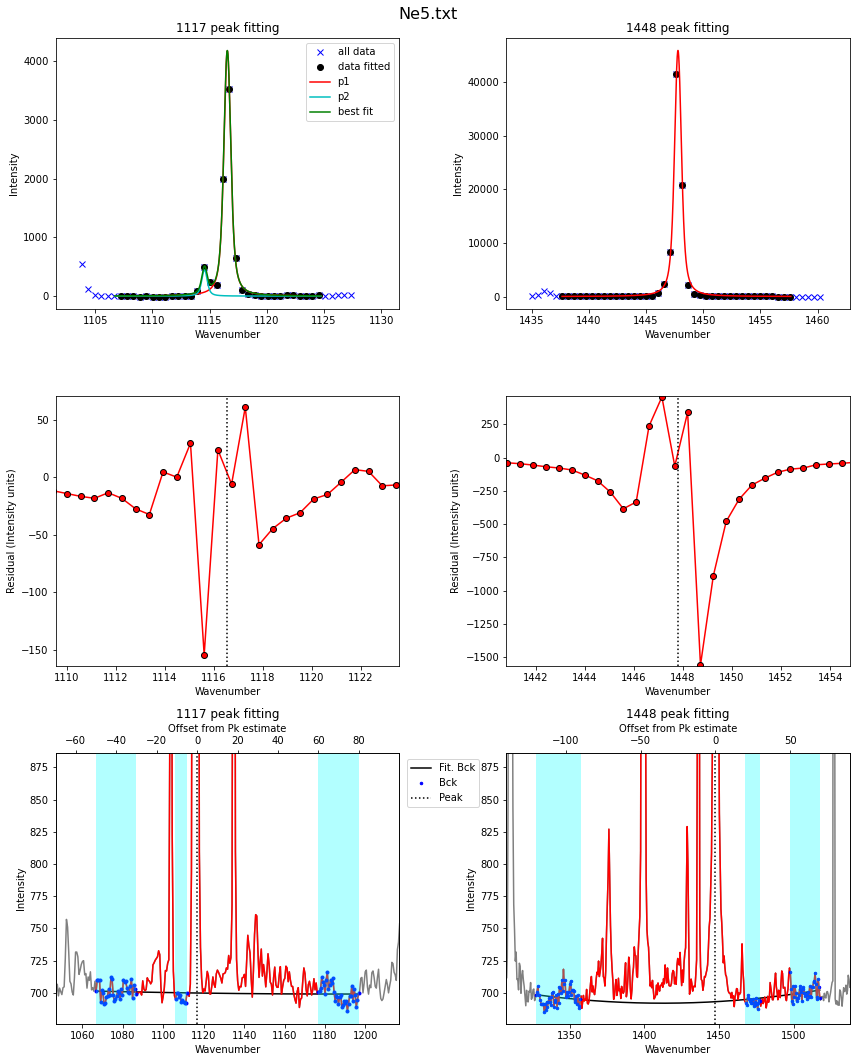

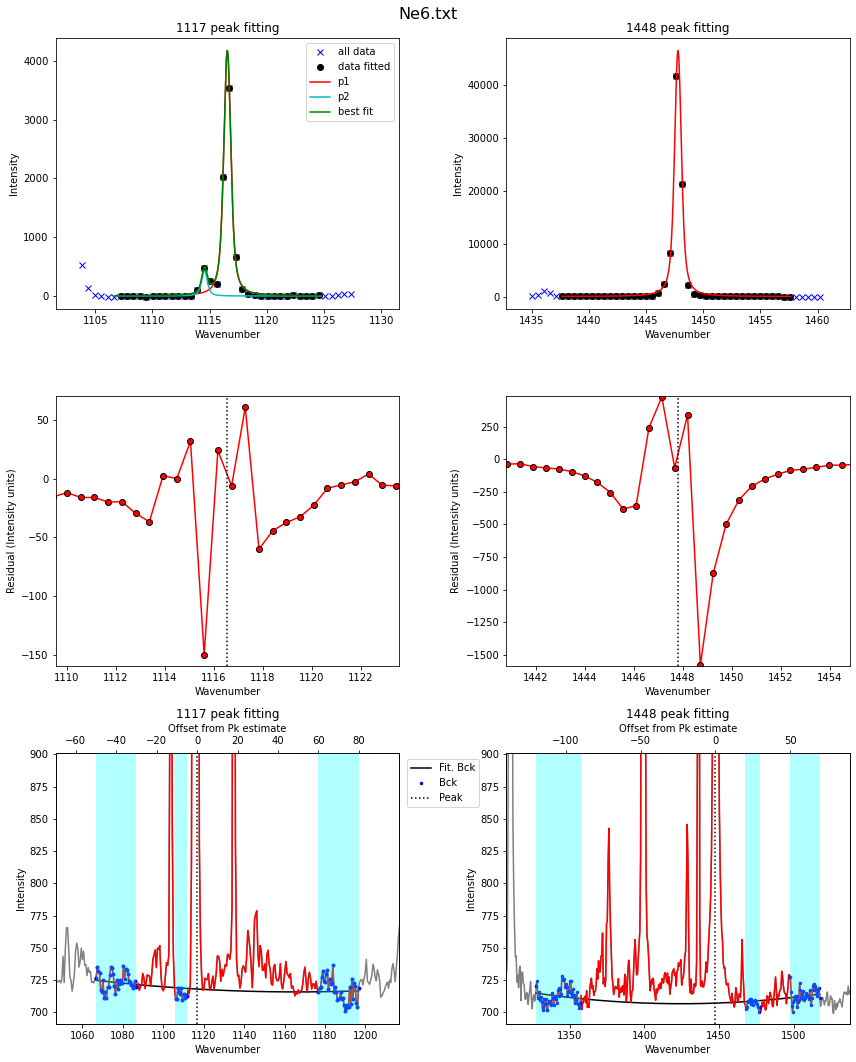

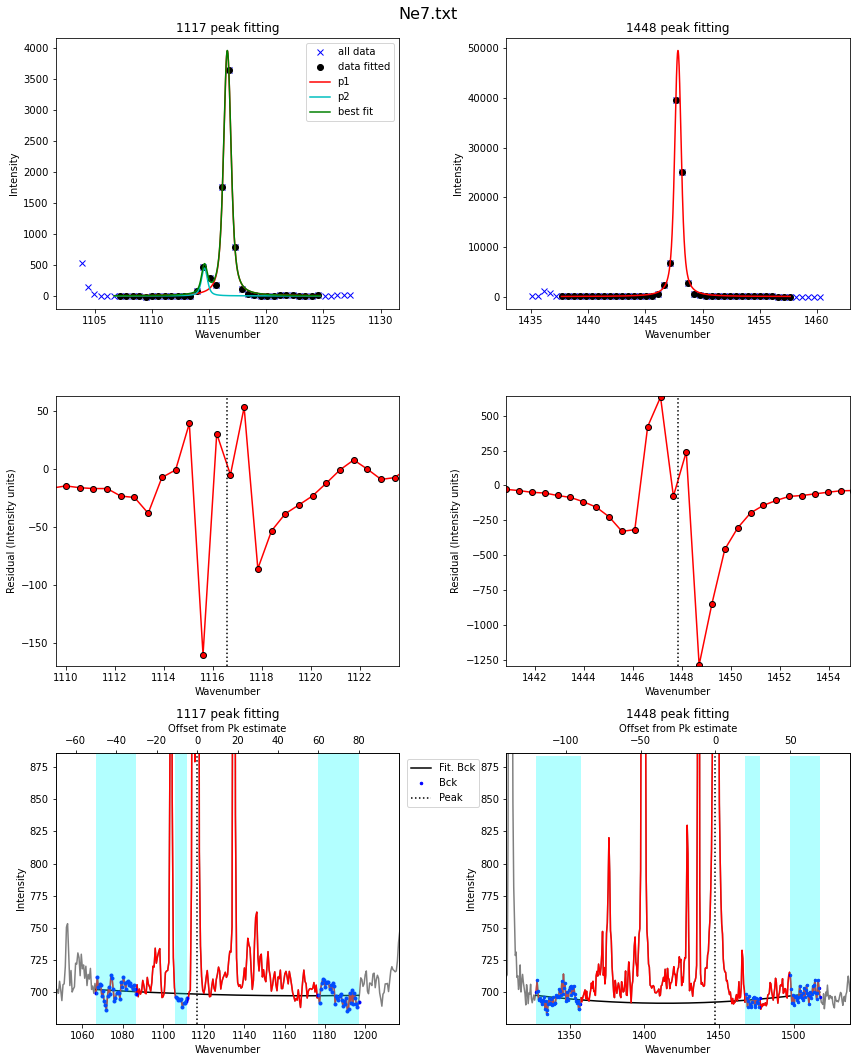

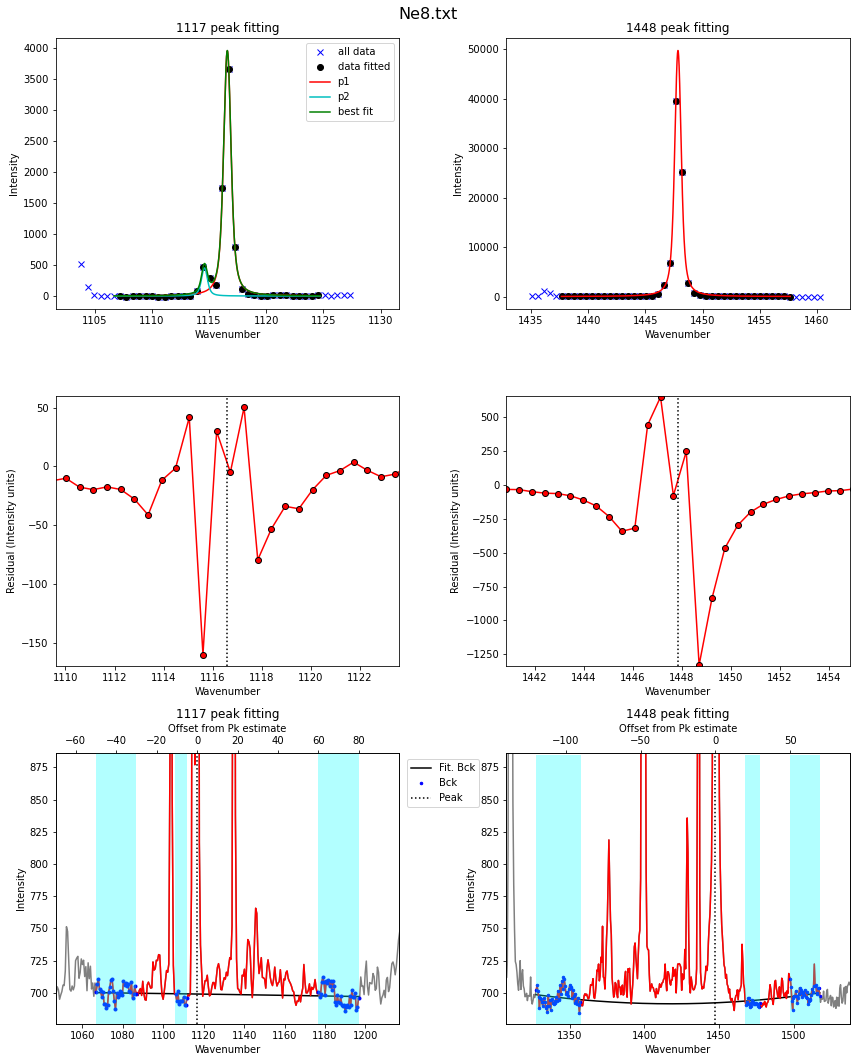

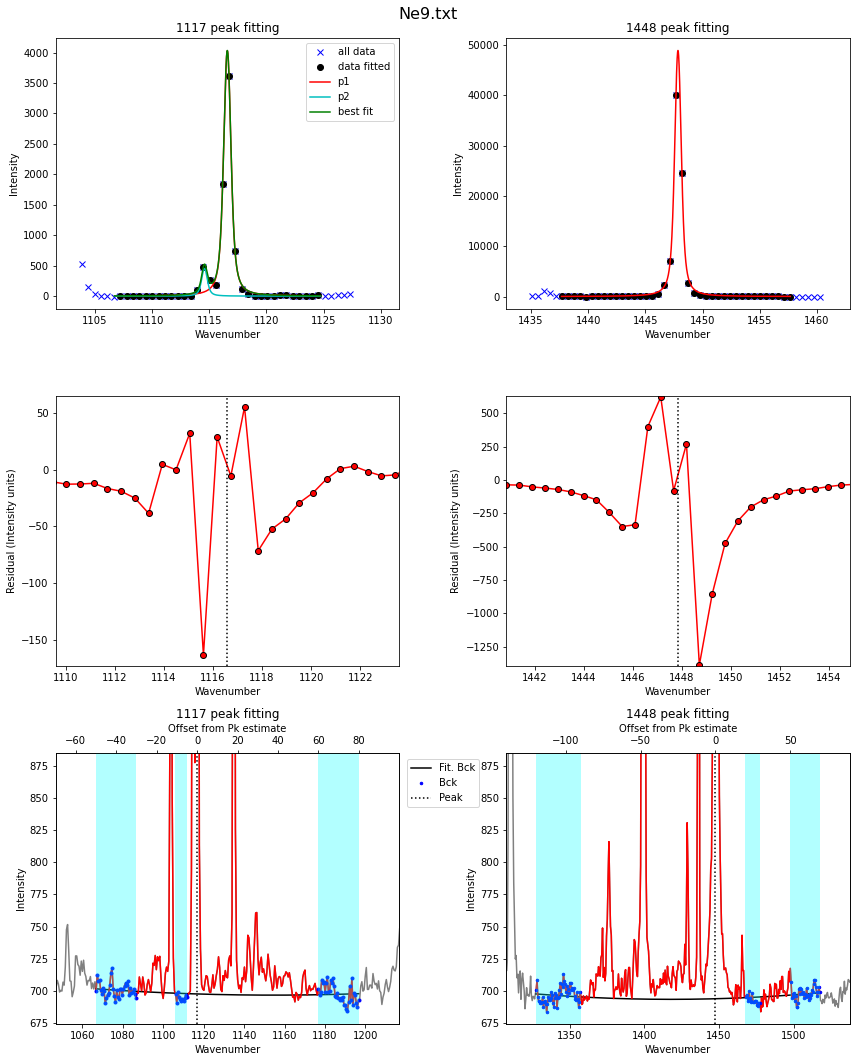

In [373]:
df2=pf.loop_Ne_lines(files=Ne_files, path=mypath, filetype='headless_txt',
                  config=Ne_Config, peaks_1=peaks_1, Ne=Ne, Ne_center_1=nearest_pk1,
                  Ne_center_2=nearest_pk2, DeltaNe_ideal=ideal_split['Ne_Split'], 
                  plot_figure=True, save_clipboard=True, single_acq=False)

# If any are weird, can fit again here
- If you refit, you'll have to replace the value in the saved dataframe

In [374]:
# # Which file
# filename2=Ne_files[1]  # Or you could put a string here, like 'NE1.txt' 

# # Tweak fit

# Ne_Config2=pf.Ne_peak_config(amplitude=100, LH_offset_mini=[2, 5], 
# lower_bck_pk1=(-50, -30), upper_bck1_pk1=[7, 13], upper_bck2_pk1=[50, 80],
# lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],
# x_range_peak=15, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])
# Ne_Config

# # You also need to set whether you want 1 peak or 2 for the LH diad
# peaks_1=2

# df_test=pf.fit_Ne_lines(  
#     config=Ne_Config2, peaks_1=peaks_1,
#     Ne=Ne, filename=filename2, path=mypath, prefix=prefix,
#     Ne_center_1=nearest_pk1, Ne_center_2=nearest_pk2,
#     DeltaNe_ideal=ideal_split['Ne_Split'])                                                                 
                                                                     
        
# #config: Ne_peak_config=Ne_peak_config(),

In [375]:
# See what deliminators you have in your metadata file you have just got
print(meta['filename'][0])

Ne1.txt


In [376]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=False,
    suffix=False,
   file_type='.txt')

file_m

array(['Ne1', 'Ne2', 'Ne3', 'Ne4', 'Ne5', 'Ne6', 'Ne7', 'Ne8', 'Ne9',
       'Ne10', 'Ne11'], dtype=object)

In [377]:
name=meta['filename'].iloc[0]
name

'Ne1.txt'

In [378]:
# See what file names you have for your actual datafiles
print(df2['filename'][0])

Ne1.txt


In [379]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(names=df2['filename'],
    prefix=False, suffix=False,
   file_type='.txt')
file_s

array(['Ne1', 'Ne10', 'Ne11', 'Ne2', 'Ne3', 'Ne4', 'Ne5', 'Ne6', 'Ne7',
       'Ne8', 'Ne9'], dtype=object)

In [383]:
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df_combo=df2.merge(meta, on='name_for_matching')
df_combo

,filename_x,pk2_peak_cent,pk2_amplitude,pk2_sigma,pk2_gamma,error_pk2,pk1_peak_cent,pk1_amplitude,pk1_sigma,pk1_gamma,...,date,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,index
0,Ne1.txt,1447.777663,43008.394456,0.202923,0.202923,0.00518,1116.536945,4129.811556,0.200569,0.200569,...,"October 25, 2022\n",11.992,45.0,3.0,50.0,"['0h', '2m', '19s']",12:58:55 PM\n,46735.0,1325.004,0
1,Ne10.txt,1447.836182,46898.638067,0.193934,0.193934,0.00436,1116.579440,4290.986176,0.214421,0.214421,...,"October 25, 2022\n",12.056,45.0,3.0,50.0,"['0h', '2m', '16s']",3:11:39 PM\n,54699.0,1325.004,1
2,Ne11.txt,1447.835881,46638.448813,0.193794,0.193794,0.00439,1116.575621,4252.745978,0.215095,0.215095,...,"October 25, 2022\n",12.057,45.0,3.0,50.0,"['0h', '2m', '16s']",3:15:35 PM\n,54935.0,1325.004,2
3,Ne2.txt,1447.783369,43327.983134,0.201970,0.201970,0.00520,1116.540399,4130.892263,0.201497,0.201497,...,"October 25, 2022\n",11.994,45.0,3.0,50.0,"['0h', '2m', '16s']",1:02:23 PM\n,46943.0,1325.004,3
4,Ne3.txt,1447.784547,43435.387133,0.201357,0.201357,0.00519,1116.541515,4091.855927,0.201536,0.201536,...,"October 25, 2022\n",11.996,45.0,3.0,50.0,"['0h', '2m', '16s']",1:05:02 PM\n,47102.0,1325.004,4
5,Ne4.txt,1447.789987,44037.777436,0.200682,0.200682,0.00509,1116.546086,4118.304040,0.202136,0.202136,...,"October 25, 2022\n",11.989,45.0,3.0,50.0,"['0h', '2m', '16s']",1:09:00 PM\n,47340.0,1325.004,5
6,Ne5.txt,1447.794105,44126.235753,0.200498,0.200498,0.00501,1116.550851,4071.207076,0.203426,0.203426,...,"October 25, 2022\n",11.985,45.0,3.0,50.0,"['0h', '2m', '16s']",1:17:43 PM\n,47863.0,1325.004,6
7,Ne6.txt,1447.797836,44416.477379,0.199510,0.199510,0.00501,1116.550893,4115.690527,0.206068,0.206068,...,"October 25, 2022\n",11.987,45.0,3.0,50.0,"['0h', '2m', '16s']",1:20:22 PM\n,48022.0,1325.004,7
8,Ne7.txt,1447.849541,44765.582044,0.188535,0.188535,0.00395,1116.597877,4098.416020,0.216522,0.216522,...,"October 25, 2022\n",12.068,45.0,3.0,50.0,"['0h', '2m', '17s']",2:12:27 PM\n,51147.0,1325.004,8
9,Ne8.txt,1447.849903,44872.703838,0.188322,0.188322,0.00401,1116.600621,4095.674360,0.215907,0.215907,...,"October 25, 2022\n",12.062,45.0,3.0,50.0,"['0h', '2m', '16s']",2:15:21 PM\n,51321.0,1325.004,9


In [384]:
# df_combo=df_combo.drop([0,3])
df_combo

,filename_x,pk2_peak_cent,pk2_amplitude,pk2_sigma,pk2_gamma,error_pk2,pk1_peak_cent,pk1_amplitude,pk1_sigma,pk1_gamma,...,date,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,index
0,Ne1.txt,1447.777663,43008.394456,0.202923,0.202923,0.00518,1116.536945,4129.811556,0.200569,0.200569,...,"October 25, 2022\n",11.992,45.0,3.0,50.0,"['0h', '2m', '19s']",12:58:55 PM\n,46735.0,1325.004,0
1,Ne10.txt,1447.836182,46898.638067,0.193934,0.193934,0.00436,1116.579440,4290.986176,0.214421,0.214421,...,"October 25, 2022\n",12.056,45.0,3.0,50.0,"['0h', '2m', '16s']",3:11:39 PM\n,54699.0,1325.004,1
2,Ne11.txt,1447.835881,46638.448813,0.193794,0.193794,0.00439,1116.575621,4252.745978,0.215095,0.215095,...,"October 25, 2022\n",12.057,45.0,3.0,50.0,"['0h', '2m', '16s']",3:15:35 PM\n,54935.0,1325.004,2
3,Ne2.txt,1447.783369,43327.983134,0.201970,0.201970,0.00520,1116.540399,4130.892263,0.201497,0.201497,...,"October 25, 2022\n",11.994,45.0,3.0,50.0,"['0h', '2m', '16s']",1:02:23 PM\n,46943.0,1325.004,3
4,Ne3.txt,1447.784547,43435.387133,0.201357,0.201357,0.00519,1116.541515,4091.855927,0.201536,0.201536,...,"October 25, 2022\n",11.996,45.0,3.0,50.0,"['0h', '2m', '16s']",1:05:02 PM\n,47102.0,1325.004,4
5,Ne4.txt,1447.789987,44037.777436,0.200682,0.200682,0.00509,1116.546086,4118.304040,0.202136,0.202136,...,"October 25, 2022\n",11.989,45.0,3.0,50.0,"['0h', '2m', '16s']",1:09:00 PM\n,47340.0,1325.004,5
6,Ne5.txt,1447.794105,44126.235753,0.200498,0.200498,0.00501,1116.550851,4071.207076,0.203426,0.203426,...,"October 25, 2022\n",11.985,45.0,3.0,50.0,"['0h', '2m', '16s']",1:17:43 PM\n,47863.0,1325.004,6
7,Ne6.txt,1447.797836,44416.477379,0.199510,0.199510,0.00501,1116.550893,4115.690527,0.206068,0.206068,...,"October 25, 2022\n",11.987,45.0,3.0,50.0,"['0h', '2m', '16s']",1:20:22 PM\n,48022.0,1325.004,7
8,Ne7.txt,1447.849541,44765.582044,0.188535,0.188535,0.00395,1116.597877,4098.416020,0.216522,0.216522,...,"October 25, 2022\n",12.068,45.0,3.0,50.0,"['0h', '2m', '17s']",2:12:27 PM\n,51147.0,1325.004,8
9,Ne8.txt,1447.849903,44872.703838,0.188322,0.188322,0.00401,1116.600621,4095.674360,0.215907,0.215907,...,"October 25, 2022\n",12.062,45.0,3.0,50.0,"['0h', '2m', '16s']",2:15:21 PM\n,51321.0,1325.004,9


In [385]:
nm=idnm+str(peak1_cent)+'_'+str(peak2_cent) #string name for excel file
outpath=r"P:\WORK-ACAD\BERKELEY-VIBE\RAMAN\CORNELL FDCA DATA\CCMR FDCA RAW DATA\Timetest\OUTPUT"
df_combo.to_excel(outpath+'/'+nm+".xlsx")

## Now lets inspect what our Ne correction factors actually look like

In [386]:
help(pf.plot_Ne_corrections)

Help on function plot_Ne_corrections in module DiadFit.ne_lines:

plot_Ne_corrections(df=None, x_axis=None, x_label='index', marker='o', mec='k', mfc='r')
    ## Plot to help inspect which Ne lines to discard



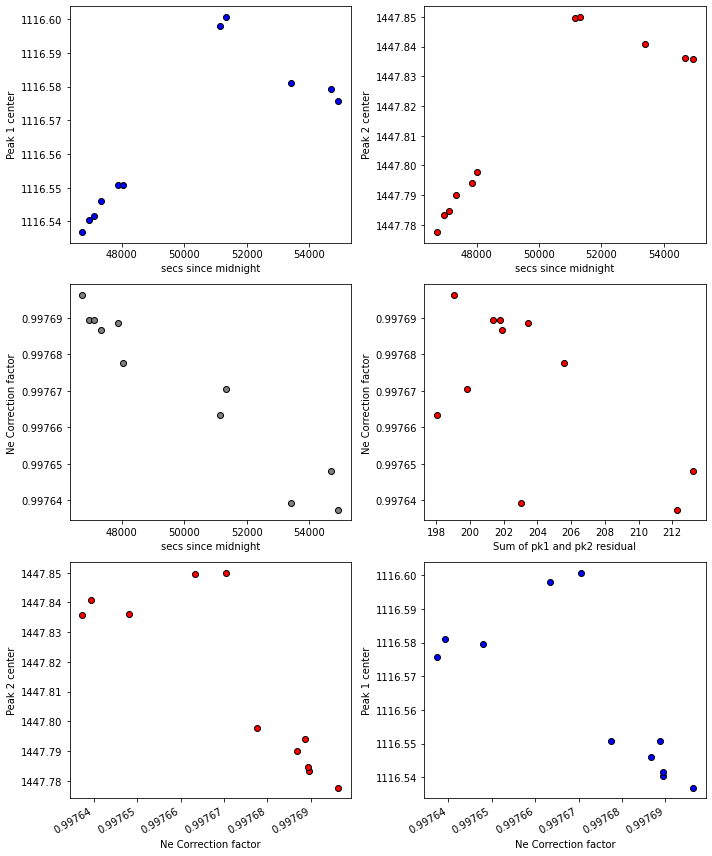

In [387]:
fig=pf.plot_Ne_corrections(df=df_combo, x_axis=df_combo['sec since midnight'],
                      x_label='secs since midnight')

## Now lets make a regression against time

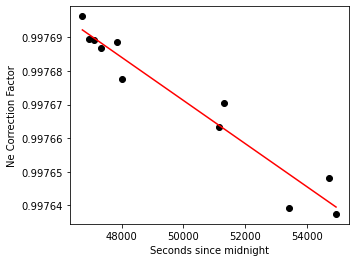

In [388]:
model=pf.reg_Ne_lines_time(df=df_combo, N_poly=1, fit='poly')

## SAving as pickle, can then load as a pickle

In [389]:
import pickle
with open(r"P:\WORK-ACAD\BERKELEY-VIBE\RAMAN\CORNELL FDCA DATA\CCMR FDCA RAW DATA\Timetest\OUTPUT\Pickles\Ne_Line_Regression_timetest.pck", 'wb') as file_handle:
    pickle.dump(model, file_handle)